<a href="https://colab.research.google.com/github/AdriansaWP/Belajar_CO2Emission/blob/main/Tugas_Rancang_Machine_Learning_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

forecasting usd - gbp currency rate using lstm
anggota :
- christ zefanya / 672017239
- dionisius jovan
- adriansa wahyu
- susi agustin
- ririnayu ardila

In [ ]:
from google.colab import files
uploaded  = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
data

NameError: ignored

In [ ]:
data = data.iloc[:,0:5]
data



,Date,Open,High,Low,Close
0,2004-06-08,875.0,900.0,875.0,887.5
1,2004-06-09,887.5,912.5,875.0,900.0
2,2004-06-10,900.0,900.0,887.5,900.0
3,2004-06-11,887.5,900.0,887.5,900.0
4,2004-06-14,900.0,900.0,875.0,887.5
...,...,...,...,...,...
3912,2020-02-24,32825.0,33000.0,32550.0,32625.0
3913,2020-02-25,32750.0,32800.0,32550.0,32650.0
3914,2020-02-26,32500.0,32675.0,32100.0,32100.0
3915,2020-02-27,32350.0,32375.0,31000.0,31450.0


<function matplotlib.pyplot.show>

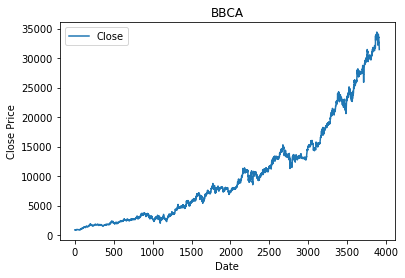

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data['Close'])
plt.title("BBCA")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.legend(['Close'], loc='upper left')
plt.show

data asli

In [ ]:

print ("null value\n", data.isna().sum())

null value
 Date     0
Open     8
High     8
Low      8
Close    8
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

train_cols = ["Close"]
df_train, df_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False)
print ("Train dan data test size: ", len(df_train), len(df_test))


x = df_train.loc[:, train_cols].values 
min_max_scaller = MinMaxScaler()
x_train = min_max_scaller.fit_transform(x)
x_test = min_max_scaller.transform(df_test.loc[:, train_cols])

x_train

x_test

Train dan data test size:  3133 784


array([[0.9637263 ],
       [0.9637263 ],
       [0.9637263 ],
       [0.96207749],
       [0.96042869],
       [0.9637263 ],
       [0.9637263 ],
       [0.9637263 ],
       [0.9637263 ],
       [0.9637263 ],
       [0.96042869],
       [0.9637263 ],
       [0.9637263 ],
       [0.96207749],
       [0.96207749],
       [0.96042869],
       [0.9637263 ],
       [0.97197032],
       [0.97197032],
       [0.96702391],
       [0.97526793],
       [0.97361913],
       [0.98845837],
       [0.99340478],
       [1.0016488 ],
       [1.01319044],
       [1.01813685],
       [1.0362737 ],
       [1.03297609],
       [1.03297609],
       [1.04286892],
       [1.05111294],
       [1.03297609],
       [1.0346249 ],
       [1.04616653],
       [1.04616653],
       [1.08408904],
       [1.08573784],
       [1.08573784],
       [1.09233306],
       [1.1055235 ],
       [1.08573784],
       [1.05770816],
       [1.05770816],
       [1.05770816],
       [1.08408904],
       [1.09398186],
       [1.089

In [ ]:


def build_timeseries(mat, y_col_index):
  dim_0 = mat.shape[0] - TIME_STEPS
  dim_1 = mat.shape[1]
  
  x = np.zeros((dim_0, TIME_STEPS, dim_1))
  y = np.zeros((dim_0,))

  for i in range(dim_0): 
    x[i] = mat[i:TIME_STEPS+i]
    y[i] = mat[TIME_STEPS+i, y_col_index]
  print ("Panjang data time series i/o ", x.shape, y.shape)
  return x,y

In [ ]:
def trim_dataset(mat, batch_size):
  no_of_rows_drop = mat.shape[0]%batch_size
  if(no_of_rows_drop > 0 ):
    return mat[:-no_of_rows_drop]
  else:
    return mat

In [ ]:
import numpy as np

TIME_STEPS = 30 
BATCH_SIZE = 100
x_t, y_t = build_timeseries(x_train, 0) 
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test,0)
x_val = trim_dataset(x_t, BATCH_SIZE)
y_val = trim_dataset(y_t, BATCH_SIZE)


Panjang data time series i/o  (3103, 30, 1) (3103,)
Panjang data time series i/o  (754, 30, 1) (754,)


In [ ]:
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.recurrent import LSTM



lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS,x_t.shape[2]),stateful = True, kernel_initializer= 'random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20, activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))


lstm_model.compile(loss ='mean_squared_error', optimizer='RMSprop')

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (100, 100)                40800     
_________________________________________________________________
dropout_3 (Dropout)          (100, 100)                0         
_________________________________________________________________
dense_5 (Dense)              (100, 20)                 2020      
_________________________________________________________________
dense_6 (Dense)              (100, 1)                  21        
Total params: 42,841
Trainable params: 42,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:

nn_train = lstm_model.fit(x_t, y_t, epochs=100, verbose=1, batch_size=BATCH_SIZE,shuffle=False,
                          validation_data=(trim_dataset(x_val, BATCH_SIZE),trim_dataset(y_val, BATCH_SIZE)))

Train on 3100 samples, validate on 3100 samples
Epoch 1/100
3100/3100 [==============================] - 2s 792us/step - loss: nan - val_loss: nan
Epoch 2/100
3100/3100 [==============================] - 2s 551us/step - loss: nan - val_loss: nan
Epoch 3/100
3100/3100 [==============================] - 2s 537us/step - loss: nan - val_loss: nan
Epoch 4/100
3100/3100 [==============================] - 2s 544us/step - loss: nan - val_loss: nan
Epoch 5/100
 100/3100 [..............................] - ETA: 1s - loss: nan

KeyboardInterrupt: ignored

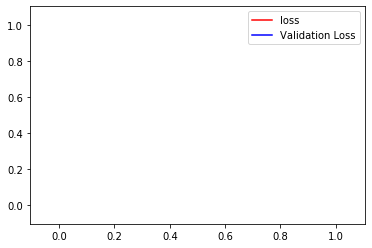

In [ ]:

loss = nn_train.history['loss']
val_loss = nn_train.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', color = 'red', label="loss")
plt.plot(epochs, val_loss, 'b', color = 'blue', label="Validation Loss")
plt.legend()

[diatas] valiidation loss & loss. buat ngecek over fitting apa ngga

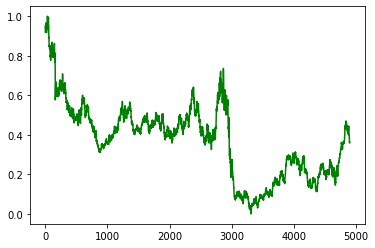

In [ ]:
plt.plot(y_t, color="green", label="Real Data")


diatas : grafik data training

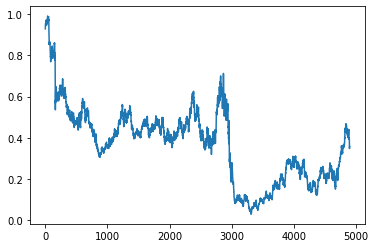

In [ ]:

ramal2 = lstm_model.predict(x_val, batch_size=100) 
plt.plot(ramal2)

grafik forecasting data training

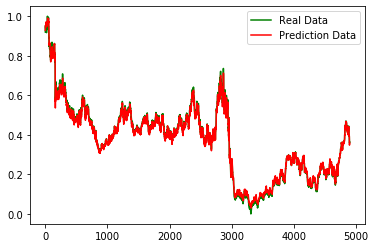

In [ ]:
plt.plot(y_t, color="green", label="Real Data")
plt.plot(ramal2, color="red", label="Prediction Data")
plt.legend()

grafik gabungan real data dan forecasting


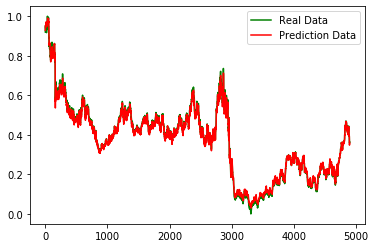

In [ ]:
plt.plot(y_t, color="green", label="Real Data")
plt.plot(ramal2, color="red", label="Prediction Data")
plt.legend()

In [ ]:
import numpy as np

TIME_STEPS = 30 
BATCH_SIZE = 100
x_t, y_t = build_timeseries(x_train, 0) 
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)

x_val = trim_dataset(x_t, BATCH_SIZE)
y_val = trim_dataset(y_t, BATCH_SIZE)

x_temp, y_temp = build_timeseries(x_test,0)
x_t2 = trim_dataset(x_temp, BATCH_SIZE)
y_t2 = trim_dataset(y_temp, BATCH_SIZE)

x_val2 = trim_dataset(x_temp, BATCH_SIZE)
y_val2 = trim_dataset(y_temp, BATCH_SIZE)


Panjang data time series i/o  (4936, 30, 1) (4936,)
Panjang data time series i/o  (1212, 30, 1) (1212,)


In [ ]:


lstm_model2 = Sequential()
lstm_model2.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS,x_t2.shape[2]),stateful = True, kernel_initializer= 'random_uniform'))
lstm_model2.add(Dropout(0.5))
lstm_model2.add(Dense(20, activation='relu'))
lstm_model2.add(Dense(1,activation='sigmoid'))


lstm_model2.compile(loss ='mean_squared_error', optimizer='RMSprop')

lstm_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (100, 100)                40800     
_________________________________________________________________
dropout_2 (Dropout)          (100, 100)                0         
_________________________________________________________________
dense_3 (Dense)              (100, 20)                 2020      
_________________________________________________________________
dense_4 (Dense)              (100, 1)                  21        
Total params: 42,841
Trainable params: 42,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_train2 = lstm_model2.fit(x_t2, y_t2, epochs=1000, verbose=1, batch_size=BATCH_SIZE,shuffle=False,
                          validation_data=(trim_dataset(x_val2, BATCH_SIZE),trim_dataset(y_val2, BATCH_SIZE)))

Train on 1200 samples, validate on 1200 samples
Epoch 1/1000
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 2/1000
1200/1200 [==============================] - 1s 538us/step - loss: 0.0066 - val_loss: 0.0069
Epoch 3/1000
1200/1200 [==============================] - 1s 503us/step - loss: 0.0066 - val_loss: 0.0068
Epoch 4/1000
1200/1200 [==============================] - 1s 508us/step - loss: 0.0065 - val_loss: 0.0067
Epoch 5/1000
1200/1200 [==============================] - 1s 539us/step - loss: 0.0064 - val_loss: 0.0066
Epoch 6/1000
1200/1200 [==============================] - 1s 513us/step - loss: 0.0063 - val_loss: 0.0065
Epoch 7/1000
1200/1200 [==============================] - 1s 522us/step - loss: 0.0063 - val_loss: 0.0064
Epoch 8/1000
1200/1200 [==============================] - 1s 504us/step - loss: 0.0061 - val_loss: 0.0063
Epoch 9/1000
1200/1200 [==============================] - 1s 522us/step - loss: 0.0061 - val_loss: 0.0062


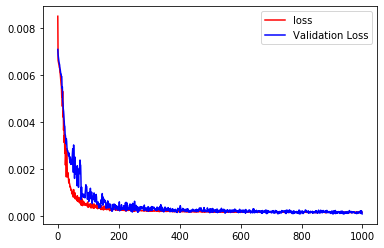

In [ ]:

loss = nn_train2.history['loss']
val_loss = nn_train2.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', color = 'red', label="loss")
plt.plot(epochs, val_loss, 'b', color = 'blue', label="Validation Loss")
plt.legend()

grafik yg val loss sm loss buat data testing

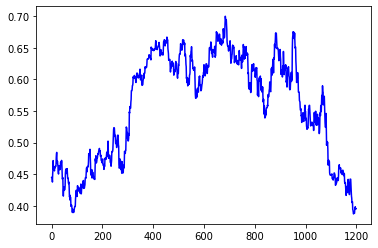

In [ ]:

ramal3 = lstm_model2.predict(x_val2, batch_size=100) 

plt.plot(ramal3, color="Blue", label="Forecast Data")




grafik forecasting data testing

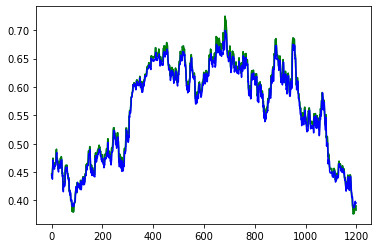

In [ ]:

plt.plot(y_t2)
plt.plot(y_t2, color="green", label="Prediction Data")
plt.plot(ramal3, color="blue", label="Forecast Data")

In [ ]:
plt.plot(y_t2, color = "green")